In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [2]:
df = pd.read_csv('World-Stock-Prices-Dataset.csv')

In [3]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2024-11-26 00:00:00-05:00,9.430000,10.100000,9.420000,9.650000,15814000.0,0.0,0.0,peloton,PTON,fitness,usa,NaN
1,2024-11-26 00:00:00-05:00,173.199997,173.429993,172.309998,172.520004,398500.0,0.0,0.0,toyota,TM,automotive,japan,NaN
2,2024-11-26 00:00:00-05:00,116.889999,117.220001,115.889999,116.120003,51500.0,0.0,0.0,adidas,ADDYY,apparel,germany,NaN
3,2024-11-26 00:00:00-05:00,305.609985,306.970001,302.000000,305.570007,2130500.0,0.0,0.0,american express,AXP,finance,usa,NaN
4,2024-11-26 00:00:00-05:00,47.290001,47.820000,47.090000,47.090000,700.0,0.0,0.0,puma,PMMAF,apparel,germany,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299378,2000-01-03 00:00:00-05:00,25.215814,25.330655,24.690826,24.772856,2173400.0,0.0,0.0,3m,MMM,manufacturing,usa,NaN
299379,2000-01-03 00:00:00-05:00,72.313085,72.405794,71.756831,72.034958,21200.0,0.0,0.0,toyota,TM,automotive,japan,NaN
299380,2000-01-03 00:00:00-05:00,7.289986,7.342182,7.098602,7.168196,882200.0,0.0,0.0,nordstrom,JWN,retail,usa,NaN
299381,2000-01-03 00:00:00-05:00,28.774989,28.808351,28.207830,28.608177,4275000.0,0.0,0.0,procter & gamble,PG,consumer goods,usa,NaN


In [5]:
df.info

<bound method DataFrame.info of                              Date        Open        High         Low  \
0       2024-11-26 00:00:00-05:00    9.430000   10.100000    9.420000   
1       2024-11-26 00:00:00-05:00  173.199997  173.429993  172.309998   
2       2024-11-26 00:00:00-05:00  116.889999  117.220001  115.889999   
3       2024-11-26 00:00:00-05:00  305.609985  306.970001  302.000000   
4       2024-11-26 00:00:00-05:00   47.290001   47.820000   47.090000   
...                           ...         ...         ...         ...   
299378  2000-01-03 00:00:00-05:00   25.215814   25.330655   24.690826   
299379  2000-01-03 00:00:00-05:00   72.313085   72.405794   71.756831   
299380  2000-01-03 00:00:00-05:00    7.289986    7.342182    7.098602   
299381  2000-01-03 00:00:00-05:00   28.774989   28.808351   28.207830   
299382  2000-01-03 00:00:00-05:00    5.731675    5.793975    5.427959   

             Close      Volume  Dividends  Stock Splits  \
0         9.650000  15814000.0  

In [6]:
#analyzing datatypes of columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

8

In [7]:
#missing values
missing_percentages = df.isna().sum().sort_values(ascending=False)
missing_percentages

Capital Gains    299381
Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Dividends             0
Stock Splits          0
Brand_Name            0
Ticker                0
Industry_Tag          0
Country               0
dtype: int64

In [8]:
df['Country'].unique()

array(['usa', 'japan', 'germany', 'netherlands', 'france', 'canada',
       'switzerland'], dtype=object)

In [9]:
df['Ticker'].unique()

array(['PTON', 'TM', 'ADDYY', 'AXP', 'PMMAF', 'V', 'ADBE', 'SQ', 'UL',
       'CSCO', 'JPM', 'LVMUY', 'ABNB', 'MAR', 'ZI', 'HLT', 'AMD', 'MCD',
       'HD', 'MA', 'JNJ', 'UBER', 'PG', 'COIN', 'FDX', 'MMM', 'JWN',
       'PHG', 'FL', 'NFLX', 'KO', 'UBSFY', 'CROX', 'LUV', 'SHOP', 'AMZN',
       'AAPL', 'NKE', 'TGT', 'GOOGL', 'SPOT', 'ZM', 'DIS', 'RBLX',
       'NTDOY', 'DAL', 'MSFT', 'COST', 'AEO', 'HSY', 'TSLA', 'PINS',
       'BAMXF', 'CMG', 'POAHY', 'LOGI', 'CL', 'CRM', 'NVDA', 'SBUX',
       'HMC'], dtype=object)

In [10]:
df['Industry_Tag'].unique()

array(['fitness', 'automotive', 'apparel', 'finance', 'technology',
       'financial services', 'consumer goods', 'luxury goods',
       'hospitality', 'food', 'retail', 'healthcare', 'cryptocurrency',
       'logistics', 'manufacturing', 'footwear', 'entertainment',
       'food & beverage', 'gaming', 'aviation', 'e-commerce', 'music',
       'social media'], dtype=object)

In [11]:
#Dropping the date column
columns_to_drop = ['Date']
df=df.drop(columns=columns_to_drop)

In [12]:
X = df.drop('Close', axis=1)
y = df['Close']

In [13]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X['Brand_Name'] = label_encoder.fit_transform(X['Brand_Name'])
X['Ticker'] = label_encoder.fit_transform(X['Ticker'])
X['Industry_Tag'] = label_encoder.fit_transform(X['Industry_Tag'])
X['Country'] = label_encoder.fit_transform(X['Country'])

In [14]:

#spliting data into 80-20 form  with random 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=99)

# Prediction Using Linear Regression

In [20]:
from sklearn.impute import SimpleImputer

# Create an imputer that replaces NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')  # Use 'median' or 'most_frequent' as alternative strategies

# Fit the imputer on the training data and transform both X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now fit the model on the imputed data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_imputed, y_train)


LinearRegression()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

# Impute missing values using the same strategy (mean, median, etc.)
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'

# Fit the imputer on the training set and transform both X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # Apply the same transformation to X_test

# Train the model on the imputed training data
model.fit(X_train_imputed, y_train)

# Make predictions using the imputed test data
y_pred = model.predict(X_test_imputed)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.3680904474904705
MSE: 1.0566664985362988
RMSE: 1.0279428478939376


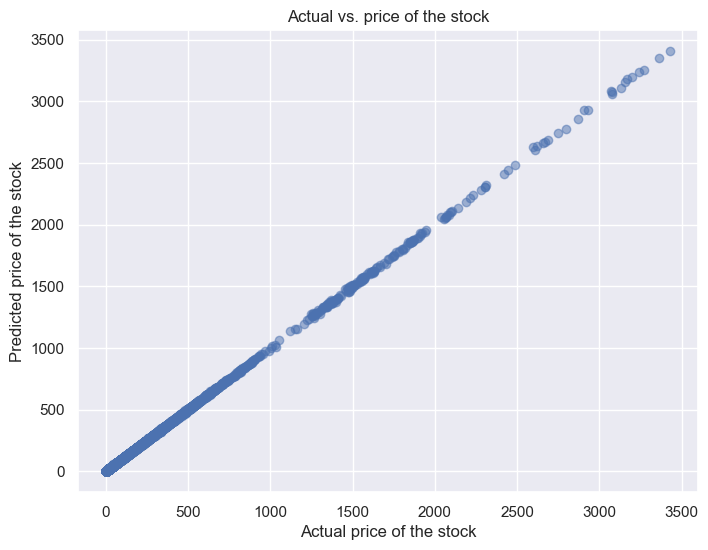

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction Using Decision Tree Algorithm

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [30]:
decision_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

In [31]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [32]:
y_pred = decision_tree.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 3.977109085819277
Root Mean Squared Error: 1.99426906053804


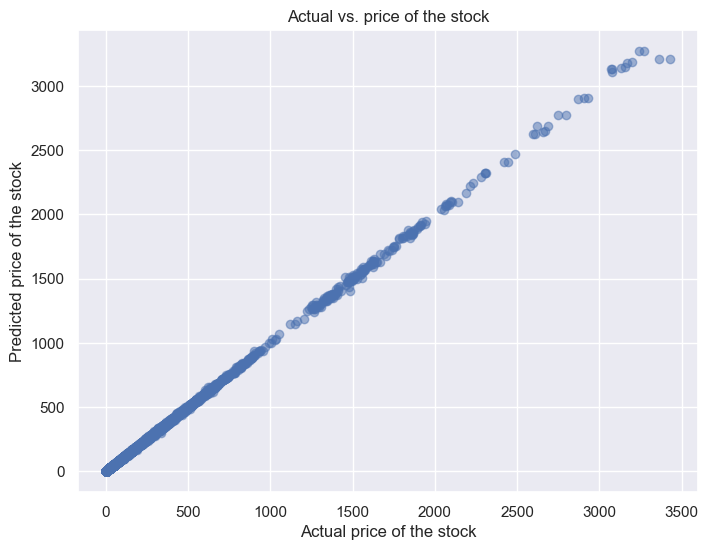

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction using k-nearest neighbors (KNN) regression

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


Open                  0
High                  0
Low                   0
Volume                0
Dividends             0
Stock Splits          0
Brand_Name            0
Ticker                0
Industry_Tag          0
Country               0
Capital Gains    239505
dtype: int64
0


In [54]:
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and y_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))  # Reshaping for y_train if it's a 1D array


In [55]:
# Drop rows with missing values in X_train and y_train
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]  # Align y_train with X_train


In [49]:
# Drop rows with missing values in both X_train and y_train
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]

# Do the same for X_test and y_test if needed
X_test_dropped = X_test.dropna()
y_test_dropped = y_test[X_test_dropped.index]

# Fit the model on the dropped data
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train_dropped, y_train_dropped)

# Make predictions using the cleaned test data
y_pred = knn.predict(X_test_dropped)


In [57]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_imputed, y_train_imputed)  # Or X_train_dropped, y_train_dropped if dropping rows


KNeighborsRegressor()

In [63]:
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Now, apply the same imputer transformation to the test data
X_test_imputed = imputer.transform(X_test)  # Use the already fitted imputer

# Fit your KNN model on the imputed training data
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_imputed, y_train)

# Make predictions on the imputed test data
y_pred = knn.predict(X_test_imputed)

In [64]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 5209.005882844329
Root Mean Squared Error: 72.17344305798586


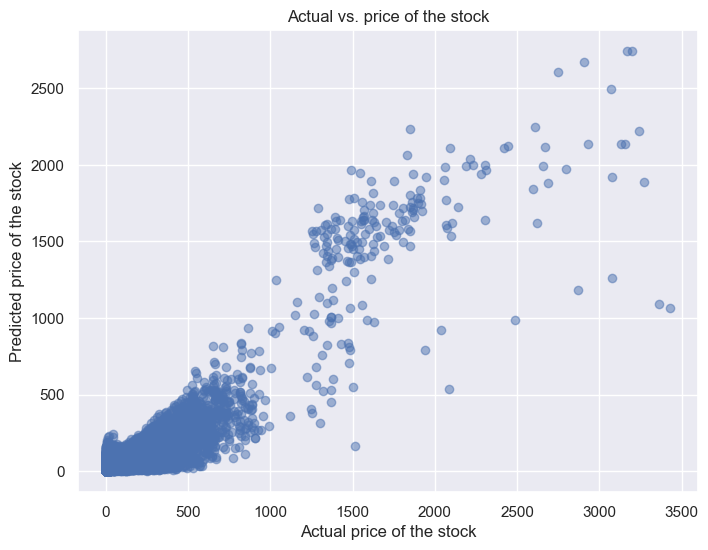

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction Using Ridge Regression

In [66]:
from sklearn.linear_model import Ridge

In [68]:
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train_imputed, y_train_imputed)

C:\Users\prasa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.54539e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [69]:
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train_imputed, y_train_imputed)

C:\Users\prasa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.54539e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [71]:
y_pred = ridge_regressor.predict(X_test_imputed)

In [72]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 1.0566662395142878
Root Mean Squared Error: 1.027942721903457


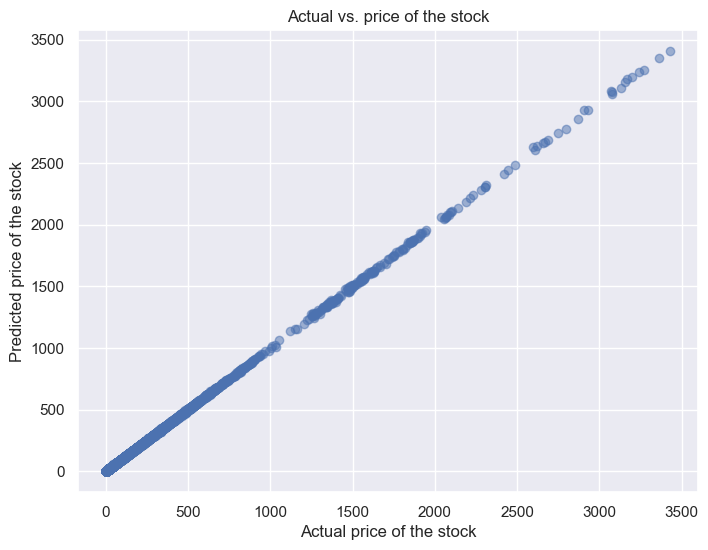

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction Using Laso Regression

In [80]:
from sklearn.linear_model import Lasso


In [76]:
lasso_regressor = Lasso(alpha=1.0)
lasso_regressor.fit(X_train_imputed, y_train_imputed)

C:\Users\prasa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.304e+05, tolerance: 4.526e+05
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [83]:
y_pred = lasso_regressor.predict(X_test_imputed)

In [84]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 4.606113829621789
Root Mean Squared Error: 2.1461858795597806


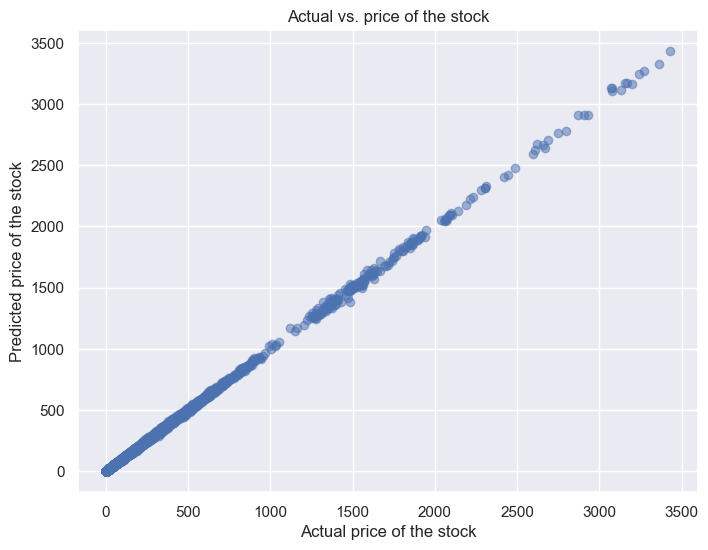

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction Using Polynomial Regression

In [86]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_imputed)
X_test_poly = poly.transform(X_test_imputed)

In [92]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [93]:
y_pred = model.predict(X_test_poly)

In [94]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 9402.494249584066
Root Mean Squared Error: 96.96645940521942


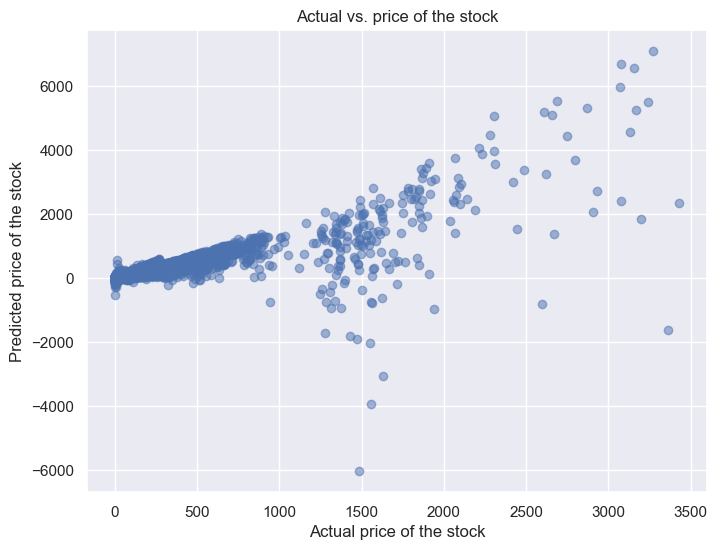

In [95]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()


# Prediction Using Bayesian Ridge Regression

In [96]:
from sklearn.linear_model import BayesianRidge

In [97]:
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

BayesianRidge()

In [100]:
y_pred = bayesian_regressor.predict(X_test_imputed)

In [101]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 1.0566646946241354
Root Mean Squared Error: 1.027941970455597


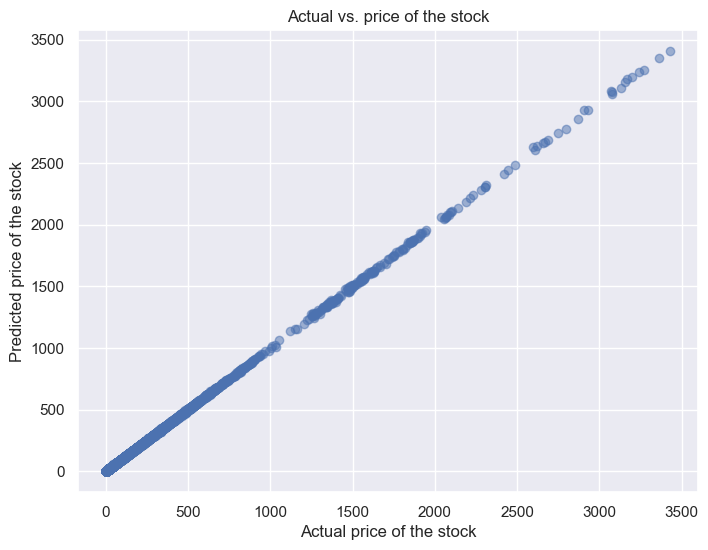

In [102]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()